# Goal-conditioned Pointer Network 

## General Idea

set of instructions
sequence of data $(d_j)_{1\leq j \leq N}$
The model learns to find the right element of the sequence given the set of instruction

Content aware attention : 

$(h_j)_{1\leq j \leq m(d)} = lstm(d)$

$i = embedding(instruction)$

$x_j = V^T \cdot \tanh(W1 \cdot h_j + W2 \cdot i)$

$ p(d_j | i, d) = softmax(x_j | x)$

### Setup

Try a simple set where the set of instruction is of size 2 : {Find the max, Find the min} and the set of data is a list of int

### Hyperparameter to test

- Bidrectional lstm ? 
- number of units attention : first tries show that the more attention units the better
- initialize lstm weights
- number of lstm layers

### Ideas to keep in mind

- Look at the instruction embedding after training

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import time

from torch import optim
import matplotlib.pyplot as plt
import numpy as np

from simulator.instruction_pointer_network import InstructedPointerNetwork, batch, train, evaluate

%matplotlib notebook

In [3]:
HIDDEN_SIZE = 256
ATTENTION_UNITS = 128

BATCH_SIZE = 64
STEPS_PER_EPOCH = 100
EPOCHS = 300

N_INSTR = 5
TASK = 'many'
if 'many' in TASK:
    TASK += f'_{N_INSTR}'

In [69]:
CUDA = True
HIDDEN_SIZE = 256
ATTENTION_UNITS = 128
N_ENCODER_LAYERS = 1

TRAIN_BATCH_SIZE = 64
LEN_RANGE = (10, 30)
MAX_NB = 100

STEPS_PER_EPOCH = 150
EPOCHS = 250

EVAL_BATCH_SIZE = 32
N_EVAL = 10

N_INSTR = 5
TASK = 'many'
if 'many' in TASK:
    TASK += f'_{N_INSTR}'

In [70]:
ptr_net = InstructedPointerNetwork(hidden_size=HIDDEN_SIZE, units=ATTENTION_UNITS, n_instruction=N_INSTR,
                                   bidirectional_encoder=True, n_encoder_layers=N_ENCODER_LAYERS)
optimizer = optim.Adam(ptr_net.parameters())
# min_max_acc = []
idx_acc = []
loss_record = []
for epoch in range(EPOCHS):
    t0 = time.time()
    loss = train(ptr_net, optimizer,
          task=TASK,
          epoch=epoch + 1,
          step_per_epoch=STEPS_PER_EPOCH,
          batch_size=TRAIN_BATCH_SIZE,
          len_range=LEN_RANGE,
          max_nb=MAX_NB,
          cuda=CUDA)
    print('{} seconds'.format(time.time() - t0))
    acc = evaluate(ptr_net,
                   task=TASK,
                   epoch=epoch + 1,
                   eval_batch_size=EVAL_BATCH_SIZE,
                   len_range=LEN_RANGE,
                   max_nb=MAX_NB, 
                   n_eval=N_EVAL)
    #     min_max_acc.append(min_max)

    loss_record.append((loss))
    idx_acc.append(acc)

Epoch [1] -- Train
Epoch [1] loss: 1.0961894989013672
1.7144191265106201 seconds
Epoch [1] -- Evaluate
idx accuracy: (0.43, 0.07)
Epoch [2] -- Train
Epoch [2] loss: 0.9864944219589233
1.6797306537628174 seconds
Epoch [2] -- Evaluate
idx accuracy: (0.42, 0.05)
Epoch [3] -- Train
Epoch [3] loss: 1.0457391738891602
1.7110860347747803 seconds
Epoch [3] -- Evaluate
idx accuracy: (0.53, 0.07)
Epoch [4] -- Train
Epoch [4] loss: 0.7895216345787048
1.6656081676483154 seconds
Epoch [4] -- Evaluate
idx accuracy: (0.64, 0.11)
Epoch [5] -- Train
Epoch [5] loss: 0.8507213592529297
1.6837453842163086 seconds
Epoch [5] -- Evaluate
idx accuracy: (0.63, 0.09)
Epoch [6] -- Train
Epoch [6] loss: 0.823451817035675
1.6450631618499756 seconds
Epoch [6] -- Evaluate
idx accuracy: (0.66, 0.06)
Epoch [7] -- Train
Epoch [7] loss: 0.6929556131362915
1.6857619285583496 seconds
Epoch [7] -- Evaluate
idx accuracy: (0.67, 0.06)
Epoch [8] -- Train
Epoch [8] loss: 0.6771363019943237
1.677175521850586 seconds
Epoch [8] -

Epoch [63] loss: 0.25253936648368835
1.6610519886016846 seconds
Epoch [63] -- Evaluate
idx accuracy: (0.83, 0.07)
Epoch [64] -- Train
Epoch [64] loss: 0.34491974115371704
1.6492183208465576 seconds
Epoch [64] -- Evaluate
idx accuracy: (0.84, 0.06)
Epoch [65] -- Train
Epoch [65] loss: 0.5077559947967529
1.6699774265289307 seconds
Epoch [65] -- Evaluate
idx accuracy: (0.86, 0.07)
Epoch [66] -- Train
Epoch [66] loss: 0.45245179533958435
1.6614494323730469 seconds
Epoch [66] -- Evaluate
idx accuracy: (0.87, 0.07)
Epoch [67] -- Train
Epoch [67] loss: 0.28719985485076904
1.6478040218353271 seconds
Epoch [67] -- Evaluate
idx accuracy: (0.87, 0.05)
Epoch [68] -- Train
Epoch [68] loss: 0.35375645756721497
1.700026273727417 seconds
Epoch [68] -- Evaluate
idx accuracy: (0.88, 0.06)
Epoch [69] -- Train
Epoch [69] loss: 0.2947227358818054
1.691274642944336 seconds
Epoch [69] -- Evaluate
idx accuracy: (0.88, 0.06)
Epoch [70] -- Train
Epoch [70] loss: 0.4209735691547394
1.3944520950317383 seconds
Epo

1.6749670505523682 seconds
Epoch [124] -- Evaluate
idx accuracy: (0.83, 0.08)
Epoch [125] -- Train
Epoch [125] loss: 0.25973939895629883
1.645946979522705 seconds
Epoch [125] -- Evaluate
idx accuracy: (0.82, 0.08)
Epoch [126] -- Train
Epoch [126] loss: 0.47031867504119873
1.6665940284729004 seconds
Epoch [126] -- Evaluate
idx accuracy: (0.87, 0.09)
Epoch [127] -- Train
Epoch [127] loss: 0.2755068838596344
1.668952226638794 seconds
Epoch [127] -- Evaluate
idx accuracy: (0.85, 0.05)
Epoch [128] -- Train
Epoch [128] loss: 0.24973556399345398
1.6616647243499756 seconds
Epoch [128] -- Evaluate
idx accuracy: (0.9, 0.04)
Epoch [129] -- Train
Epoch [129] loss: 0.18952883780002594
1.6300950050354004 seconds
Epoch [129] -- Evaluate
idx accuracy: (0.88, 0.05)
Epoch [130] -- Train
Epoch [130] loss: 0.38624197244644165
1.6079204082489014 seconds
Epoch [130] -- Evaluate
idx accuracy: (0.9, 0.05)
Epoch [131] -- Train
Epoch [131] loss: 0.21432530879974365
1.6567702293395996 seconds
Epoch [131] -- Eval

idx accuracy: (0.91, 0.05)
Epoch [185] -- Train
Epoch [185] loss: 0.20807978510856628
1.6643962860107422 seconds
Epoch [185] -- Evaluate
idx accuracy: (0.87, 0.06)
Epoch [186] -- Train
Epoch [186] loss: 0.18579772114753723
1.6813170909881592 seconds
Epoch [186] -- Evaluate
idx accuracy: (0.89, 0.03)
Epoch [187] -- Train
Epoch [187] loss: 0.26434561610221863
1.7147619724273682 seconds
Epoch [187] -- Evaluate
idx accuracy: (0.88, 0.06)
Epoch [188] -- Train
Epoch [188] loss: 0.18500928580760956
1.6328997611999512 seconds
Epoch [188] -- Evaluate
idx accuracy: (0.84, 0.05)
Epoch [189] -- Train
Epoch [189] loss: 0.20606103539466858
1.696272611618042 seconds
Epoch [189] -- Evaluate
idx accuracy: (0.89, 0.06)
Epoch [190] -- Train
Epoch [190] loss: 0.35019585490226746
1.6843833923339844 seconds
Epoch [190] -- Evaluate
idx accuracy: (0.88, 0.05)
Epoch [191] -- Train
Epoch [191] loss: 0.15861788392066956
1.6525824069976807 seconds
Epoch [191] -- Evaluate
idx accuracy: (0.89, 0.06)
Epoch [192] -- 

Epoch [245] loss: 0.21519052982330322
1.6576881408691406 seconds
Epoch [245] -- Evaluate
idx accuracy: (0.88, 0.05)
Epoch [246] -- Train
Epoch [246] loss: 0.2385687232017517
1.6656384468078613 seconds
Epoch [246] -- Evaluate
idx accuracy: (0.89, 0.05)
Epoch [247] -- Train
Epoch [247] loss: 0.09595519304275513
1.658111810684204 seconds
Epoch [247] -- Evaluate
idx accuracy: (0.88, 0.06)
Epoch [248] -- Train
Epoch [248] loss: 0.20795440673828125
1.6278119087219238 seconds
Epoch [248] -- Evaluate
idx accuracy: (0.91, 0.04)
Epoch [249] -- Train
Epoch [249] loss: 0.3746642470359802
1.6548967361450195 seconds
Epoch [249] -- Evaluate
idx accuracy: (0.9, 0.07)
Epoch [250] -- Train
Epoch [250] loss: 0.1502460241317749
1.648634672164917 seconds
Epoch [250] -- Evaluate
idx accuracy: (0.87, 0.05)


In [12]:
ptr_net = InstructedPointerNetwork(hidden_size=HIDDEN_SIZE,units=ATTENTION_UNITS, n_instruction=N_INSTR, bidirectional_encoder=True)

optimizer = optim.Adam(ptr_net.parameters())
# min_max_acc = []
idx_acc = []
for epoch in range(EPOCHS):
    t0 = time.time()
    train(ptr_net, optimizer, TASK, epoch + 1, batch_size=BATCH_SIZE, step_per_epoch=STEPS_PER_EPOCH)
    print('{} seconds'.format(time.time() - t0))
    acc = evaluate(ptr_net, TASK, epoch + 1)
#     min_max_acc.append(min_max)
    idx_acc.append(acc)

TypeError: train() missing 2 required positional arguments: 'len_range' and 'max_nb'

<IPython.core.display.Javascript object>


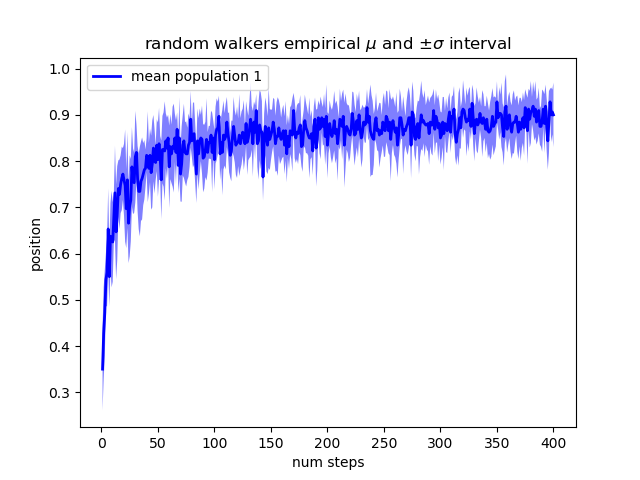

Text(0, 0.5, 'position')

In [53]:
Nsteps, Nwalkers = 400, 250
t = np.arange(Nsteps) +1

# an (Nsteps x Nwalkers) array of random walk steps
# S1 = 0.002 + 0.01*np.random.randn(Nsteps, Nwalkers)
# S2 = 0.004 + 0.02*np.random.randn(Nsteps, Nwalkers)

# an (Nsteps x Nwalkers) array of random walker positions
X1 = np.array(idx_acc)
# X2 = np.array(min_max_acc)


# Nsteps length arrays empirical means and standard deviations of both
# populations over time
mu1 = X1.mean(axis=1)
sigma1 = X1.std(axis=1)
# mu2 = X2.mean(axis=1)
# sigma2 = X2.std(axis=1)

# plot it!
fig, ax = plt.subplots(1)
ax.plot(t, mu1, lw=2, label='mean population 1', color='blue')
# ax.plot(t, mu2, lw=2, label='mean population 2', color='yellow')
ax.fill_between(t, np.minimum(mu1+sigma1, 1), np.maximum(mu1-sigma1, 0), facecolor='blue', alpha=0.5)
# ax.fill_between(t, np.minimum(mu2+sigma2, 1), np.maximum(mu2-sigma2, 0), facecolor='yellow', alpha=0.5)
ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
ax.legend(loc='upper left')
ax.set_xlabel('num steps')
ax.set_ylabel('position')
# ax.grid()

In [59]:
np.mean(X1[-50:])

0.8908125

In [60]:
embedding = ptr_net.instruction_embedding

In [61]:
from itertools import combinations

In [62]:
import torch

In [63]:
u = torch.LongTensor(list(combinations(range(10), 2)))

In [64]:
u.size()

torch.Size([45, 2])

In [65]:
embedding.cpu()
v = embedding(u)

[0.10949777,
 0.06342731,
 -0.03924644,
 -0.0253761,
 -0.14204665,
 0.027610138,
 -0.029168367,
 0.13685371,
 -0.063030295,
 -0.058517717]

In [67]:
for i, c in zip(list(combinations(range(10), 2)), list(torch.nn.CosineSimilarity()(v[:,0,:], v[:, 1, :]).detach().numpy())):
    print(i,c)

(0, 1) -0.13536663
(0, 2) 0.08159593
(0, 3) -0.1644519
(0, 4) 0.13294226
(0, 5) -0.118079245
(0, 6) 0.14149289
(0, 7) -0.086780794
(0, 8) -0.07477288
(0, 9) 0.08092719
(1, 2) -0.0604372
(1, 3) 0.1253813
(1, 4) -0.028383581
(1, 5) 0.09200081
(1, 6) -0.09115171
(1, 7) 0.027941495
(1, 8) 0.027678978
(1, 9) -0.19409712
(2, 3) -0.07603032
(2, 4) 0.1099464
(2, 5) 0.0012898897
(2, 6) 0.010239362
(2, 7) 0.103786275
(2, 8) 0.042599518
(2, 9) 0.09742704
(3, 4) -0.053298928
(3, 5) 0.18366079
(3, 6) -0.0689588
(3, 7) -0.016157838
(3, 8) 0.11718551
(3, 9) -0.16300093
(4, 5) -0.07699071
(4, 6) 0.037213363
(4, 7) -0.04040691
(4, 8) -0.08277653
(4, 9) 0.021246118
(5, 6) -0.010925623
(5, 7) -0.16084301
(5, 8) -0.03710017
(5, 9) -0.13688274
(6, 7) 0.03956844
(6, 8) -0.1940834
(6, 9) 0.046741992
(7, 8) 0.039368276
(7, 9) 0.034304954
(8, 9) -0.054795485


In [1]:
import torch
for i in range(10000):
    t = torch.rand(3)
    temp = (t - 0.5).relu() # met toutes les proba < 0.5 à 0
    temp = temp.sum() # stricly positive only if at least one proba > 0.5
    temp *= 100000 # define sensibility to 0.00001, make temp > 1 if at least one proba > 0.50001
    bool_value= temp.clamp(0, 1)
    assert (t.max() > 0.5) == bool_value

In [36]:
t = torch.rand(3, requires_grad=True)

In [37]:
import torch
for i in range(10000):
    t = torch.rand(3, requires_grad=True)
    temp_neg = (t - 0.5).relu()
    temp_neg /= t - 0.5
    u = temp_neg.sum()
    bool_value = u.clamp(-1,1)
    
    try:
        assert (t.max() > 0.5) == bool_value
    except AssertionError:
        print(t)
        print(u)

tensor([0.3876, 0.8032, 0.0410], requires_grad=True)

tensor(1., grad_fn=<ClampBackward>)

In [21]:
torch.autograd.grad(u.clamp(0,1), temp_neg)

(tensor([1., 1., 1.]),)

In [17]:
u.grad

In [2]:
t = torch.rand(3)
print(t)
temp_pos = (t+0.5).clamp(0,1)
print(temp_pos)

tensor([0.1115, 0.7100, 0.6234])
tensor([0.6115, 1.0000, 1.0000])


In [3]:
((temp_pos - 1).prod() + 1)

tensor(0.6115)